In [1]:
import copy
import math
from typing import Callable
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data/restaurant.csv')

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X, y = df['population'], df['profit']

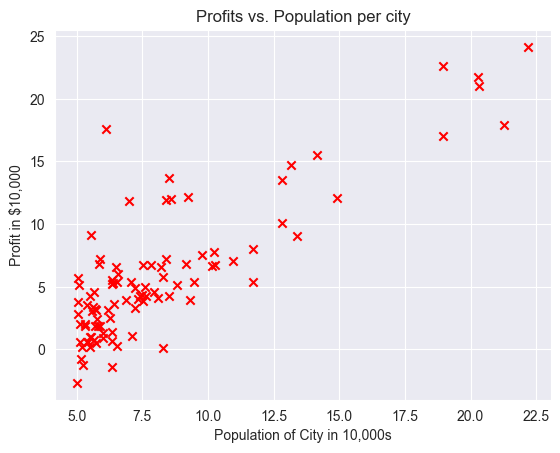

In [5]:
plt.scatter(X, y, marker='x', c='r')

# Set the title
plt.title('Profits vs. Population per city')
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

- The model function for linear regression, which is a function that maps from `X` (city population) to `y` (restaurant's monthly profit for that city) is represented as 

$$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, find the best $(w,b)$ parameters that fit the dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits the data is the best one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, use **gradient descent**. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.

Compute Cost

Gradient descent involves repeated steps to adjust the value the parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful to monitor the progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

In [6]:
def compute_cost(X: np.ndarray, y: np.ndarray, w: float, b: float) -> float:
    """
    Computes the cost function for linear regression.

    Args:
        x: Input to the model (Population of cities)
        y: Label (Actual profits for the cities)
        w, b: Parameters of the model

    Returns
        total_cost: The cost of using w,b as the parameters for linear regression to fit the data points in x and y
    """
    # number of training examples
    m = X.shape[0]
    total_cost = 0

    cost = 0
    for i in range(m):
        f_wb = w * X[i] + b
        cost += (f_wb - y[i]) ** 2

    total_cost = cost / (2 * m)

    return total_cost

In [7]:
initial_w = 2
initial_b = 1

cost = compute_cost(X, y, initial_w, initial_b)
print(f'Cost at initial w (zeros): {cost:.3f}')

Cost at initial w (zeros): 75.203


## Gradient descent

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value



* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$

In [8]:
def compute_gradient(X: np.ndarray, y: np.ndarray, w: float, b: float) -> Tuple[float, float]:
    """
    Computes the gradient for linear regression
    Args:
      x: Input to the model (Population of cities)
      y: Label (Actual profits for the cities)
      w, b : Parameters of the model
    Returns
      dj_dw: The gradient of the cost w.r.t. the parameters w
      dj_db: The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = X.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * X[i] + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i]) * X[i]
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [9]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(X, y, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


### Learning parameters using batch gradient descent 

Find the optimal parameters of a linear regression model by using batch gradient descent. Batch refers to running all the examples in one iteration.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [10]:
def gradient_descent(
    X: np.ndarray,
    y: np.ndarray,
    w_in: float,
    b_in: float,
    cost_function: Callable,
    gradient_function: Callable,
    alpha: float,
    num_iters: int,
) -> Tuple[np.ndarray, float]:
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x: Shape (m,)
      y: Shape (m,)
      w_in, b_in: Initial values of parameters of the mode
          cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha: Learning rate
      num_iters: number of iterations to run gradient descent
    Returns
      w: Updated values of parameters of the model after running gradient descent
      b: Updated value of parameter of the model after running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            cost = cost_function(X, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f'Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ')

    return w, b, J_history, w_history  # return w and J,w history for graphing

In [11]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.0
initial_b = 0.0

# some gradient descent settings
iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print('w,b found by gradient descent:', w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [12]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

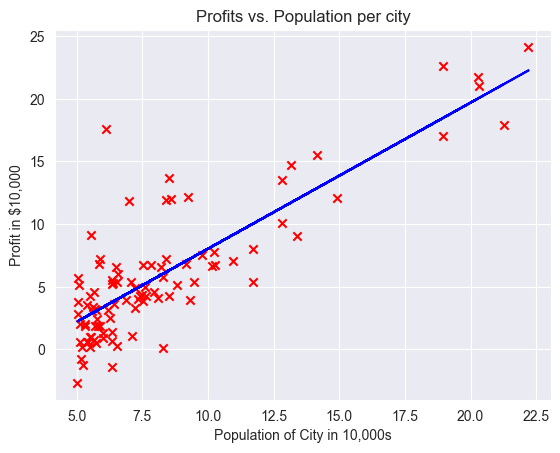

In [13]:
# Plot the linear fit
plt.plot(X, predicted, c='b')

# Create a scatter plot of the data.
plt.scatter(X, y, marker='x', c='r')

# Set the title
plt.title('Profits vs. Population per city')
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')